![](tec.png)


    
## **Análisis de Datos Masivos**
## Visualizacion de datos 2
## **Nombre del docente**
### José Gabriel Rodriguez Rivas
## **Nombre del alumno**
### Najib Alejandro Loera Rodriguez

In [37]:
#importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
# Importar archivo excel apartier dee el reglon 20
df_canada = pd.read_excel('Canada.xlsx',
                          sheet_name= 'Canada by Citizenship',
skiprows = range(20), skipfooter = 2)

df_canada

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59


In [39]:
df_canada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
Type        195 non-null object
Coverage    195 non-null object
OdName      195 non-null object
AREA        195 non-null int64
AreaName    195 non-null object
REG         195 non-null int64
RegName     195 non-null object
DEV         195 non-null int64
DevName     195 non-null object
1980        195 non-null int64
1981        195 non-null int64
1982        195 non-null int64
1983        195 non-null int64
1984        195 non-null int64
1985        195 non-null int64
1986        195 non-null int64
1987        195 non-null int64
1988        195 non-null int64
1989        195 non-null int64
1990        195 non-null int64
1991        195 non-null int64
1992        195 non-null int64
1993        195 non-null int64
1994        195 non-null int64
1995        195 non-null int64
1996        195 non-null int64
1997        195 non-null int64
1998        195 non-null int64
1999        195 non-n

In [40]:
#Crear lista de con todos los years

years = list(map(int, range(1980,2014)))
df_tot = pd.DataFrame(df_canada[years].sum(axis=0))


### Graficos de dispersion

In [41]:
df_tot.head()
df_tot.index = map(int, df_tot.index)
df_tot.reset_index(inplace= True)
df_tot.columns = ['Años', 'Total']

In [42]:
df_tot.head()

,Años,Total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


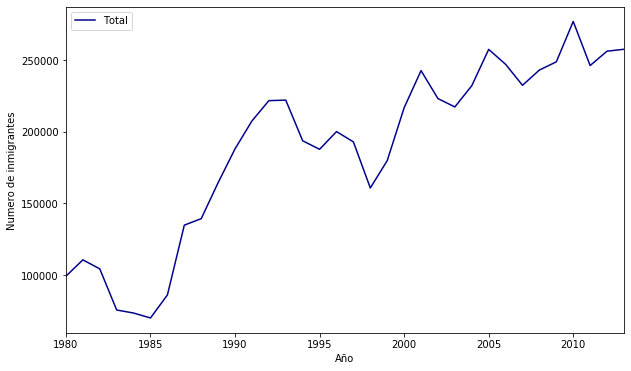

In [43]:
df_tot.plot(x='Años', y='Total',figsize=(10,6), color='darkblue')
plt.title = ('tal de Inmigracion a canada de 1980 al 2014')
plt.xlabel('Año')
plt.ylabel('Numero de inmigrantes')
plt.show()



### Obtener la linea de mejor ajuste para la linea de regresion

x = coordenadas x de los datos <br>
y = coordenadas y de los datos <br>
fit = grado de ajuste del poinomio 1=lineal, 2=cuadratico

In [44]:
x = df_tot['Años']
y = df_tot['Total']
fit = np.polyfit(x, y, deg=1)

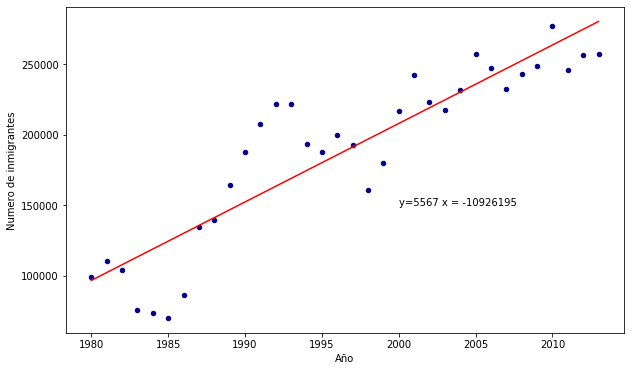

In [45]:
df_tot.plot(kind='scatter',x='Años', y='Total',figsize=(10,6), color='darkblue')
plt.title = ('tal de Inmigracion a canada de 1980 al 2014')
plt.xlabel('Año')
plt.ylabel('Numero de inmigrantes')
plt.plot(x, fit[0]*x+fit[1], color='red')
plt.annotate('y={0:.0f} x = {1:.0f}'.format(fit[0], fit[1]), xy=(2000,150000))
plt.show()

### Grafico de burbujas "Burble"

In [46]:
df_canada_t = df_canada.set_index('OdName', inplace= True)
df_canada_t = df_canada[years].transpose()
df_canada_t.index = map(int, df_canada_t.index)
df_canada_t.index.name = 'Year'
df_canada_t.reset_index(inplace = True)
df_canada_t.head()

OdName,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,...,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,...,6661,90,0,0,142,7583,0,0,16,32


Proceso de normalizacion de los datos usando tecnicas de escalamiento de caracteristicas

In [47]:
norm_mexico = (df_canada_t['Mexico'] - df_canada_t['Mexico'].min())/(df_canada_t['Mexico'].max() - df_canada_t['Mexico'].min() )

In [48]:
norm_argentina = (df_canada_t['Argentina'] - df_canada_t['Argentina'].min())/(df_canada_t['Argentina'].max() - df_canada_t['Argentina'].min() )

In [53]:
norm_brazil = (df_canada_t['Brazil'] - df_canada_t['Brazil'].min())/(df_canada_t['Brazil'].max() - df_canada_t['Brazil'].min() )

In [49]:
norm_argentina.head()

0    0.111039
1    0.148483
2    0.277598
3    0.029051
4    0.026469
Name: Argentina, dtype: float64

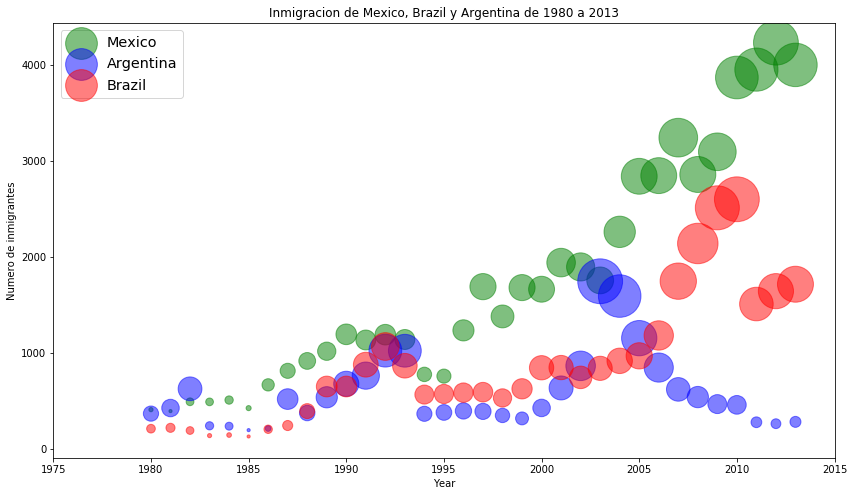

In [54]:
ax0 = df_canada_t.plot(kind = 'scatter',x='Year', y='Mexico',figsize=(14,8),
                       alpha=0.5 ,color='green',
                      s = norm_mexico*2000+10, xlim= (1975,2015))
ax1 = df_canada_t.plot(kind = 'scatter',x='Year', y='Argentina',figsize=(14,8),
                       alpha=0.5 ,color='blue',
                      s = norm_argentina*2000+10, ax = ax0)

ax2 = df_canada_t.plot(kind = 'scatter',x='Year', y='Brazil',figsize=(14,8),
                       alpha=0.5 ,color='red',
                      s = norm_brazil*2000+10, ax = ax0)

ax0.set_title('Inmigracion de Mexico, Brazil y Argentina de 1980 a 2013')
ax0.set_ylabel('Numero de inmigrantes')
ax0.legend(['Mexico','Argentina','Brazil'],loc='upper left', fontsize='x-large')